In [32]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import os
from sklearn.model_selection import train_test_split 

for dirname, _, filenames in os.walk('audi_price(2020) data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
df = pd.read_excel('Cars.xlsx', sheet_name='Audi')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,Q3,2016,21995,Semi-Auto,28526,Diesel,160,50.4,2.0
1,A4,2015,13995,Manual,27016,Diesel,30,62.8,2.0
2,A4,2016,18498,Semi-Auto,29845,Petrol,160,45.6,2.0
3,A5,2017,20000,Automatic,44783,Diesel,145,62.8,2.0
4,Q3,2014,12300,Automatic,43195,Diesel,200,47.9,2.0
...,...,...,...,...,...,...,...,...,...
295,A5,2017,18700,Manual,20052,Petrol,145,49.6,2.0
296,A5,2015,17498,Semi-Auto,35903,Diesel,145,56.5,2.0
297,A3,2019,19995,Manual,7307,Diesel,145,51.4,1.6
298,Q3,2015,17498,Semi-Auto,40256,Diesel,160,50.4,2.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             300 non-null    object 
 1   year              300 non-null    int64  
 2   price             300 non-null    int64  
 3   type              300 non-null    object 
 4   distance          300 non-null    int64  
 5   fuel              300 non-null    object 
 6   tax               300 non-null    int64  
 7   miles per galoon  300 non-null    float64
 8   size              300 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 21.2+ KB


В датасете нет пропущенных знвчений

In [35]:
df.isnull().sum()

model               0
year                0
price               0
type                0
distance            0
fuel                0
tax                 0
miles per galoon    0
size                0
dtype: int64

In [36]:
df.dtypes

model                object
year                  int64
price                 int64
type                 object
distance              int64
fuel                 object
tax                   int64
miles per galoon    float64
size                float64
dtype: object

In [37]:
df.describe()

,year,price,distance,tax,miles per galoon,size
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2016.903333,21201.936667,26023.270000,119.200000,52.994333,1.891333
std,1.642044,9048.900688,20151.244484,60.884176,10.396195,0.499423
min,2013.000000,7000.000000,10.000000,0.000000,32.800000,1.000000
25%,2016.000000,14993.750000,10203.750000,30.000000,47.100000,1.500000
50%,2017.000000,18970.000000,22476.000000,145.000000,50.400000,2.000000
75%,2018.000000,25991.250000,35390.000000,145.000000,61.400000,2.000000
max,2020.000000,56985.000000,98940.000000,300.000000,83.100000,3.000000


In [38]:
df.columns

Index(['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size'],
      dtype='object')

In [39]:
df.columns = ['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size']

In [40]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std()
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std()
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [41]:
df = outliers(df)
df.describe()

,year,price,distance,tax,miles per galoon,size
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2016.903333,21126.687312,25919.846724,119.200000,52.994333,1.891333
std,1.642044,8793.663294,19812.278562,60.884176,10.396195,0.499423
min,2013.000000,7000.000000,10.000000,0.000000,32.800000,1.000000
25%,2016.000000,14993.750000,10203.750000,30.000000,47.100000,1.500000
50%,2017.000000,18970.000000,22476.000000,145.000000,50.400000,2.000000
75%,2018.000000,25991.250000,35390.000000,145.000000,61.400000,2.000000
max,2020.000000,48348.638730,86477.003452,300.000000,83.100000,3.000000


In [42]:
df.shape

(300, 9)

In [43]:
df['type'].nunique()

3

In [44]:
for col in df:
    print(df['type'].unique())

['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']


In [45]:
#encoding transmission
from sklearn import preprocessing
df['type'] = preprocessing.LabelEncoder().fit_transform(df['type'])
df.head(5)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,Q3,2016,21995.0,2,28526.0,Diesel,160,50.4,2.0
1,A4,2015,13995.0,1,27016.0,Diesel,30,62.8,2.0
2,A4,2016,18498.0,2,29845.0,Petrol,160,45.6,2.0
3,A5,2017,20000.0,0,44783.0,Diesel,145,62.8,2.0
4,Q3,2014,12300.0,0,43195.0,Diesel,200,47.9,2.0


К числовому формату привели фактор type

In [46]:
df['fuel'].nunique()

2

In [47]:
for col in df:
    print(df['fuel'].unique())

['Diesel' 'Petrol']
['Diesel' 'Petrol']
['Diesel' 'Petrol']
['Diesel' 'Petrol']
['Diesel' 'Petrol']
['Diesel' 'Petrol']
['Diesel' 'Petrol']
['Diesel' 'Petrol']
['Diesel' 'Petrol']


In [48]:
#encoding fuel
from sklearn import preprocessing
df['fuel'] = preprocessing.LabelEncoder().fit_transform(df['fuel'])
df.head(5)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,Q3,2016,21995.0,2,28526.0,0,160,50.4,2.0
1,A4,2015,13995.0,1,27016.0,0,30,62.8,2.0
2,A4,2016,18498.0,2,29845.0,1,160,45.6,2.0
3,A5,2017,20000.0,0,44783.0,0,145,62.8,2.0
4,Q3,2014,12300.0,0,43195.0,0,200,47.9,2.0


К числовому формату привели фактор fuel

In [49]:
df['model'].nunique()

13

In [50]:
for col in df:
    print(df['model'].unique())

['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']
['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']
['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']
['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']
['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']
['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']
['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']
['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']
['Q3' 'A4' 'A5' 'A1' 'A6' 'Q7' 'Q2' 'Q5' 'A3' 'TT' 'A8' 'Q8' 'S4']


In [51]:
#encoding body
from sklearn import preprocessing
df['model'] = preprocessing.LabelEncoder().fit_transform(df['model'])
df.head(10)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,7,2016,21995.00000,2,28526.0,0,160,50.4,2.0
1,2,2015,13995.00000,1,27016.0,0,30,62.8,2.0
2,2,2016,18498.00000,2,29845.0,1,160,45.6,2.0
3,3,2017,20000.00000,0,44783.0,0,145,62.8,2.0
4,7,2014,12300.00000,0,43195.0,0,200,47.9,2.0
5,0,2017,12500.00000,1,15735.0,1,150,55.4,1.4
6,0,2015,12995.00000,1,20042.0,1,30,57.6,1.4
7,4,2019,30985.00000,0,4445.0,0,145,47.9,2.0
8,9,2019,48348.63873,0,1510.0,0,145,33.2,3.0
9,7,2016,15500.00000,0,11863.0,0,160,50.4,2.0


К числовому формату привели фактор model

In [52]:
df.dtypes

model                 int32
year                  int64
price               float64
type                  int32
distance            float64
fuel                  int32
tax                   int64
miles per galoon    float64
size                float64
dtype: object

# Визуализация факторов

<AxesSubplot:ylabel='Frequency'>

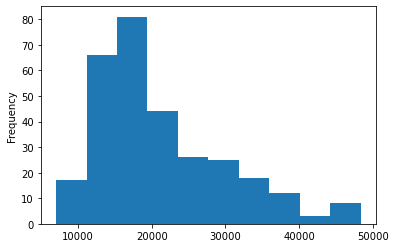

In [53]:
df['price'].plot(kind = 'hist')

Для большиства моделей цена варьируется от 15 до 20 тыс. у.е.

<AxesSubplot:ylabel='Frequency'>

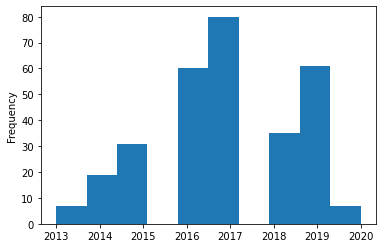

In [54]:
df['year'].plot(kind = 'hist')

Большинство моделей 2016-2017 года выпуска

<AxesSubplot:ylabel='Frequency'>

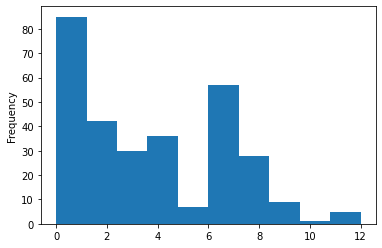

In [55]:
df['model'].plot(kind = 'hist')

Самая распространенная модель Q3

<AxesSubplot:ylabel='Frequency'>

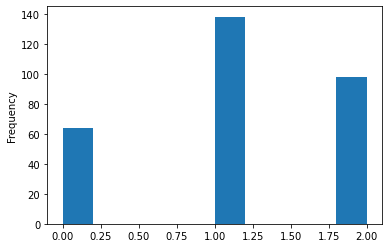

In [56]:
df['type'].plot(kind = 'hist')

Самая распространенная коробка передач - Manual

<AxesSubplot:ylabel='Frequency'>

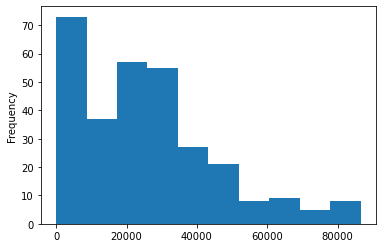

In [57]:
df['distance'].plot(kind = 'hist')

Большинство автомобилей имеют пробег до 35 тыс. км

<AxesSubplot:ylabel='Frequency'>

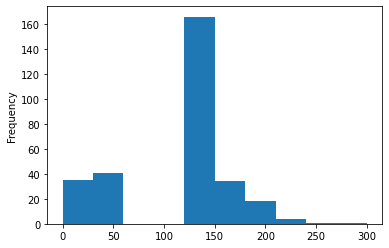

In [58]:
df['tax'].plot(kind = 'hist')

Преимущественное большиство моделей выборки имеют налог 125-150 у.е.

<AxesSubplot:ylabel='Frequency'>

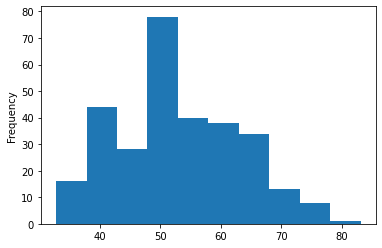

In [59]:
df['miles per galoon'].plot(kind = 'hist')

78 моделей имеют расход топлива 50-55 миль на галлон 

<AxesSubplot:ylabel='Frequency'>

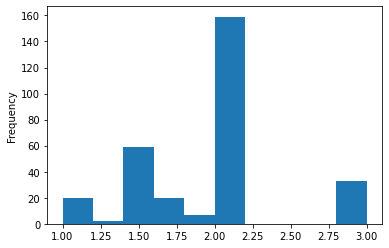

In [60]:
df['size'].plot(kind = 'hist')

Самый распространенный объем двигателя - 2.0 л

In [61]:
df.to_csv('cars1.csv', sep=',', index=False)

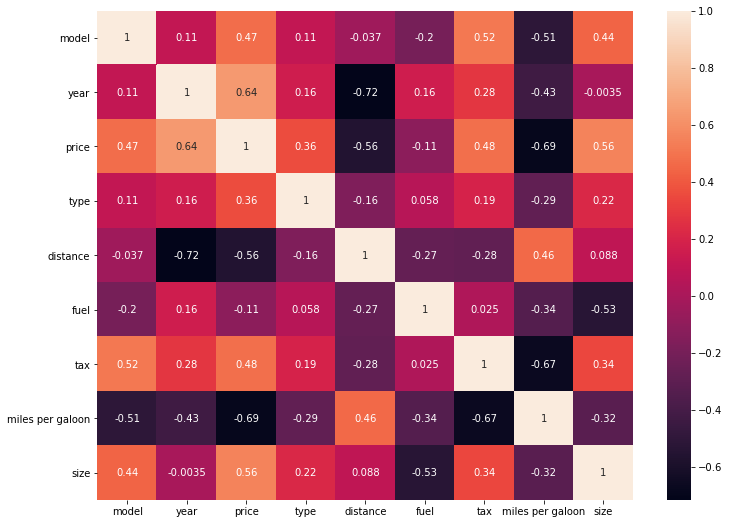

In [62]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Наибольшая корреляция между факторами Цена и Год 

In [63]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.860000,2016.903333,21126.687312,1.113333,25919.846724,0.463333,119.200000,52.994333,1.891333
std,2.974878,1.642044,8793.663294,0.727268,19812.278562,0.499487,60.884176,10.396195,0.499423
min,0.000000,2013.000000,7000.000000,0.000000,10.000000,0.000000,0.000000,32.800000,1.000000
25%,1.000000,2016.000000,14993.750000,1.000000,10203.750000,0.000000,30.000000,47.100000,1.500000
50%,3.000000,2017.000000,18970.000000,1.000000,22476.000000,0.000000,145.000000,50.400000,2.000000
75%,7.000000,2018.000000,25991.250000,2.000000,35390.000000,1.000000,145.000000,61.400000,2.000000
max,12.000000,2020.000000,48348.638730,2.000000,86477.003452,1.000000,300.000000,83.100000,3.000000
